# Kernel Methods

Kernel methods used to be extremely popular between, say, the mid-1990s until maybe seven, six years ago. What kernel methods do is a kind of a nonlinear embedding. But they do it in a clever way. So I will talk about non-linear embedding. What we want to achieve is that given some data set in some high dimensional space which has some intrinsic topology, while this date set can be very difficult to classify into two groups by some simple function-- for instance, you can have this structure where one class is embedded inside the other. And what we do is we develop some kind of a nonlinear embedding that would pull the points apart in some higher dimensional space. So in this new embedding space, you can easily separate the two classes by, say a hyperplane, which is the easiest form of classifying two data sets. And this hyperplane would tell you that whether you are on top of it, then you belong to one class. And if you are below it, then you are in the other class. And what kernel functions allow you to do is to do something which essentially achieves this effect but without having to calculate the actual embedding. So when we talked about clustering, we talked about the gram matrix In this context, this is also going to be called the kernel matrix, which characterizes distances or similarities between points in the high dimensional space, for instance, by the inner product between the vectors. So this would be the inner product in the original space. And after embedding, you can calculate the inner product between these embedded vectors. And now you can define that this inner product in the embedded space is actually just some function, some kernel function. And it turns out that if this function fulfills certain basic requirements-- namely, it's a positive semidefinite kernel-- then you don't actually have to know defined embedding. It's enough to calculate this product which is very cheap in many cases. And you can construct very interesting algorithms. So examples include kernelized k-means. So in this case, you have the k-means means clustering that we discussed, but instead of the Euclidean distance, you can come off the new distance functions. For instance, you can create this exponential decay over the Euclidean distance. So here inside, you have the Euclidean distance. But now it's inside the exponential that decays fast. So remote points would have mattered a lot less than things closer to the centroid of the k-means. And another great example is support vector machines, which ensure certain sparsity structure in the model, and they generalize well. So these models went out of fashion because in essence, they are shallow. So you only calculate this non-linear embedding, and that's it. So they are not very good in this automatic feature extraction that deep learning enables you to do. Nevertheless, they are interesting, and as you will see, they are interesting kernels that you can calculate naturally with quantum computers. 

- A nonlinear embedding of the data instances in a higher dimensional space can make classification easier. Why?

**The classes might be easier to separate by a hyperplane in the high-dimensional space.**

- The embedding space can be infinite dimensional. Consider, for instance, the kernel 
$$e^{(-\gamma\parallel x_{i}-x_{j}\parallel_{2}^{2}}$$

**True**


# An Inference  
Normally, we would take a look at some learning algorithm, dissect it, and analyze the parts of it to see whether we can find a quantum algorithm that could accelerate that part of the learning protocol. But we can start thinking about learning problems the other way around. We can start from the hardware, looking at the particular quantum computer and what are the kind of things it can naturally do. So we are in this era where quantum computers are imperfect. So we have to factor in these imperfections. And if you look at the actual capabilities, we can develop completely new learning algorithms. So one of the first examples of this kind of thinking was a particular type of kernel for learning that can be executed on a shallow circuit gate model quantum computer. So in this case, we start with a very simple state preparation. And then the only thing we are going to do on this circuit is a Hadamard operation, which will allow us to do interference. So in the first two learning protocols that we looked at, we talked about how you can map a problem to an Ising model. In other words, we used a kind of a Hamiltonian encoding. In this case, we are going to use the amplitude encoding. So if we are given some vector in our data set, which we normalized to one, then we can encode it in the probability amplitudes in a superposition. And so then we have to be careful of how we actually prepare it. But for some data sets, this can be approximated well with shallow circuits. So given this encoding, we can start thinking about new kernels. So the kernel that we are going to calculate is exactly this one. It does not really have a classical analog. It's easy to calculate classically as well, but it's very natural to do on a gate model quantum computer. The shape of the kernel function is going to be something like this. So it's not like the exponential decay of the kernel that you saw in the previous video. It's slightly different, and it might be useful for certain kind of data sets. So the circuit that are going to need, assuming that our data set is only two dimensional, is the following. We have a data qubit. Every single data point is actually going to be included in this single qubit. So this superposition is going to be interesting. Then we have an ancilla qubit, which will be entangled with the test instance that we are trying to calculate the kernel and the data instances that we are given in a training set. Then we have an index qubit, which just keeps track of this index here. And then we have a class qubit, which will contain the label corresponding to a particular data instance. And the protocol is very, very simple. First, you have to prepare a state. The state looks a bit strange. So this is our amplitude encoded test instance, the one for which we're going to calculate the kernel. And here, we have our amplitude encoding data instances. Here's our index register. For bookkeeping, it's also here. Note that these are tensor product states. So these things are not really entangled here. And then we have the ancilla qubit. So the zero state of the ancilla qubit is entangled with the test instance, and the excited state, the one state of the ancilla, is entangled with our data instances. And then to finish it off, we also have the class qubit corresponding to the data instances. So we can think of it as a big black box that does all this preparation. Plus, we have some normalization constant to take care at, you know, this superposition is actually a quantum state. And what we are doing next is nothing but this Hadamard operation here. So since the zero state of the ancilla is entangled with the test state and the excited state is entangled with the data instances, by applying the Hadamard gate again on ancilla, you interfere the data instances with your test instance. So the state that you are going to get will have this form. It will have the test instance plus the data instance. And the test instance minus the data instance is encoded in these vectors. So that's the interference part. And now what we do is we do a measurement on the ancilla if you have a certain probability of success. So by success, I mean that the superposition collapses to this particular part. And based on this, if I forget the output one, then we just discard the result and run the circuit again. And if we get this result so we collapse it to this particular outcome, then we do a measurement in the class qubit as well. And the probability of getting certain results here, we create you exactly this kernel. So the point is that you repeatedly run this algorithm. Sometimes you succeed here. Then you measure here, and based on that, you can calculate this kernel, which could be interesting for a number of applications. 

• This protocol is attractive because the state preparation step does not include any entangling gates, and therefore it is easy to execute on contemporary quantum computers.

– False

• We are using amplitude encoding in this protocol. How many qubits would we need to encode four-dimensional vectors?

– 2

• If we had three data points, would a single-qubit index register still be sufficient?
#F

Kernel methods are widespread in machine learning and they were particularly common before deep learning became a dominant paradigm. The core idea is to introduce a new notion of distance between high-dimensional data points by replacing the inner product $(x_i, x_j)$ by a function that retains many properties of the inner product, yet which is nonlinear. This function $k(.,.)$ is called a kernel. Then, in many cases, wherever a learning algorithm would use an inner product, the kernel function is used instead.

The intuition is that the kernel function acts as an inner product on a higher dimensional space and encompasses some $\phi(.)$ mapping from the original space of the data points to this space. So intuitively, the kernel function is $k(x_i, x_j)=(\phi(x_i), \phi(x_j))$. The hope is that points that were not linearly separable in the original space become linearly separable in the higher dimensional space. The $\phi(.)$ function may map to an infinite dimensional space and it does not actually have to be specified. As long as the kernel function is positive semidefinite, the idea works.

Many kernel-based learning algorithms are instance-based, which means that the final model retains some or all of the training instances and they play a role in the actual prediction. Support vector machines belong here: support vectors are the training instances which are critically important in defining the boundary between two classes. Some important kernels are listed below.

| Name | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Kernel function|
|------|-----------------|
|Linear | $(x_i,x_j)$|
|Polynomial| $((x_i,x_j)+c)^d$|
|Radial basis function|$\exp(-\gamma\|x_i-x_j\|^2)$|

The choice of kernel and the parameters of the kernel are often arbitrary and either some trial and error on the dataset or hyperparameter optimization helps choose the right combination. Quantum computers naturally give rise to certain kernels and it is worth looking at a specific variant of how it is constructed.

 # Thinking backward: learning methods based on what the hardware can do

Instead of twisting a machine learning algorithm until it only contains subroutines that have quantum variants, we can reverse our thinking and ask: given a piece of quantum hardware and its constraints, can we come up with a new learning method? For instance, interference is a very natural thing to do: we showed an option in the first notebook on quantum states, and it can also be done with a Hadamard gate. 
For this to work we need to encode both training and testvectors as amplitudes in a statevector built up out of four registers:

$|0\rangle_c|00..0\rangle_m|00..0\rangle_i|0\rangle_a$

The amplitude of such state will be equal to the value of a feature in a training vector or test vector. To do that we use four registers. The first is a single bit, acting as the ancilla ancilla (a), which will will code for either a training (a=0) or a testvector (a=1). The second register, in the notebook example a single bit, will code for the m-th training vector. The third register, in the notebook example also reduced to a single bit, codes for the i-th feature. Lastly the class bit (c) codes for class -1 (c=0), or 1 (c=1).
Hence, if after fully encoding all training data and test data into the state $|\psi>$ the state |1010> has coefficient 0.46 :

$|\psi\rangle\ = ....+ 0.46|1010\rangle +....$  ,

Then that implies that the second feature (i=1) of the first (m=0) training vector (a=0), which classifies as class 1 (c=1), has the value 0.46. Note, we assume both training vectors and test vector are normalized.

In a more general expression we can write for a fully encoded state (NB we arrange the order of the registers to be consistent with the code below):

$|\psi\rangle = \frac{1}{\sqrt{2M}}\sum_{m=0}^{M-1}|y_m\rangle|m\rangle|\psi_{x^m}\rangle|0\rangle + |y_m\rangle|m\rangle|\psi_{\tilde{x}}\rangle|1\rangle$

with:

$|\psi_{x^m}\rangle = \sum_{i=0}^{N-1}x_i^m|i\rangle, \; |\psi_{\tilde{x}}\rangle = \sum_{i=0}^{N-1}\tilde{x_i}|i\rangle. \quad$ N being equal to the number of features in the the training and test vectors

As the last summation is independent on m, there will M copies of the test vector in the statevector, one for every training vector.


We now only need to apply a Hadamard gate to the ancilla to interfere the test and training instances. Measuring and post-selecting on the ancilla gives rise to a kernel [[1](#1)].

Let's start with initializations:










In [1]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import BasicAer as Aer
import numpy as np

%matplotlib inline

np.set_printoptions(precision = 3)

q = QuantumRegister(4)
c = ClassicalRegister(4)
backend = Aer.get_backend('qasm_simulator')

We are constructing an instance-based classifier: we will calculate a kernel between all training instances and a test example. In this sense, this learning algorithm is lazy: no actual learning happens and each prediction includes the entire training set.

As a consequence, state preparation is critical to this protocol. We have to encode the training instances in a superposition in a register, and the test instances in another register. Consider the following training instances of the [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris): $S = \{(\begin{bmatrix}0 \\ 1\end{bmatrix}, 0), (\begin{bmatrix}0.790 \\ 0.615\end{bmatrix}, 1)\}$, that is, one example from class 0 and one example from class 1. Furthermore, let's have two test instances, $\{\begin{bmatrix}-0.549\\ 0.836\end{bmatrix}, \begin{bmatrix}0.053 \\ 0.999\end{bmatrix}\}$. These examples were cherry-picked because they are relatively straightforward to prepare.

In [2]:
training_set = [[0, 1], [0.79, 0.615]]
labels = [0, 1]
test_set = [[-0.549, 0.836], [0.053 , 0.999]]


To load the data vectors, we use amplitude encoding as explained above, which means that, for instance, the second training vector will be encoded as $0.78861006|0\rangle + 0.61489363|1\rangle$. Preparing these vectors only needs a rotation, and we only need to specify the corresponding angles. The first element of the training set does not even need that: it is just the $|1\rangle$ state, so we don't specify an angle for it.

To get the angle we need to solve the equation $a|0\rangle + b|1\rangle=\cos\left(\frac{\theta}{2}\right)|0\rangle + i \sin \left(\frac{\theta}{2}\right) |1\rangle$. Therefore, we will use $\theta=2 \arccos(a)$

In [3]:
def get_angle(amplitude_0):
    return 2*np.arccos(amplitude_0)

In practice, the state preparation procedure we will consider requires the application of several rotations in order to prepare each data point in the good register. Don't hesitate to check it by yourself by running the circuit below with a pen and paper.

The following function builds the circuit. We plot it and explain it in more details below.

In [4]:
def prepare_state(q, c, angles):
    ancilla_qubit = q[0]
    index_qubit = q[1]
    data_qubit = q[2]
    class_qubit = q[3]
    circuit = QuantumCircuit(q, c)
    # Put the ancilla and the index qubits into uniform superposition
    circuit.h(ancilla_qubit)
    circuit.h(index_qubit)
    circuit.barrier()

    # Prepare the test vector
    circuit.cu3(angles[0], 0, 0, ancilla_qubit, data_qubit)
    # Flip the ancilla qubit > this moves the input 
    # vector to the |0> state of the ancilla
    circuit.x(ancilla_qubit)
    circuit.barrier()


    # Prepare the first training vector
    # [0,1] -> class 0
    # We can prepare this with a Toffoli
    circuit.ccx(ancilla_qubit, index_qubit, data_qubit)
    # Flip the index qubit > moves the first training vector to the 
    # |0> state of the index qubit
    circuit.x(index_qubit)
    circuit.barrier()

    # Prepare the second training vector
    # [0.790, 0.615] -> class 1
    #
    # Ideally we would do this with a double controlled, i.e a ccry, gate
    # However in qiskit we cannot build such a gate, hence we resort to
    # the following construction
    
    circuit.ccx(ancilla_qubit, index_qubit, data_qubit)
    circuit.ry(-angles[1], data_qubit)
    circuit.ccx(ancilla_qubit, index_qubit, data_qubit)
    circuit.ry(angles[1], data_qubit)
    circuit.barrier()

    # Flip the class label for training vector #2
    circuit.cx(index_qubit, class_qubit)
   
    return circuit

Let us see the circuit for the distance-based classifier:

In [5]:
from qiskit.tools.visualization import circuit_drawer

# Compute the angles for the testvectors
test_angles = [get_angle(test_set[0][0]), get_angle(test_set[1][0])]
# Compute the angle for the second training vector (as the first vector is trivial)
training_angle = get_angle(training_set[1][0])/2

angles = [test_angles[0], training_angle]
state_preparation_0 = prepare_state(q, c, angles)
circuit_drawer(state_preparation_0, output='mpl')

AttributeError: 'QuantumCircuit' object has no attribute 'cu3'

The vertical lines are barriers to make sure that all gates are finished by that point. They also make a natural segmentation of the state preparation.

In the first section, the ancilla and index qubits are put into uniform superposition.

The second section entangles the test vector with the ground state of the ancilla.

In the third section, we prepare the state $|1\rangle$, which is the first training instance, and entangle it with the excited state of the ancilla and the ground state of the index qubit with a Toffoli gate and a Pauli-X gate. The Toffoli gate is also called the controlled-controlled-not gate, describing its action.

The fourth section prepares the second training instance and entangles it with the excited state of the ancilla and the index qubit. Next, the class qubit is flipped conditioned on the index qubit being $|1\rangle$. This creates the connection between the encoded training instances and the corresponding class label.

Let's dissect the last part where we prepare the second training state, which is $\begin{pmatrix}0.790 \\ 0.615\end{pmatrix}$ and we entangle it with the excited state of the ancilla and the excited state of the index qubit. We use `angles[1]`, which is ~`1.325/2`. Why? We have to rotate the basis state $|0\rangle$ to contain the vector we want. We could write this generic state as $\begin{pmatrix} \cos(\theta/2) \\ \sin(\theta/2)\end{pmatrix}$. Looking at the documentation of the gate implementing the rotation, you'll see that the function argument divides the angle by two, so we have to adjust for that -- this is why we divided $\theta$ by two. If you calculate the arccos or arcsin values, you will get the value in `angles[1]`.



We need to apply the rotation to data qubit only if ancilla AND index qubits are 1, in other words, we have to implement a double controlled rotation. Qiskit does not have this type of gate. Hence, we'll build it in two stages of half the required angle, designed in such a way they either add or cancel. The quantum AND gate is the CCX (also known as Toffoli), which flips the target qubit if both controls are 1. Applying the CCX flips only the data qbit of the target state. The subsequent rotation over half the desired angle works on all states, but after applying the second CCX the targed state has actually rotated in the opposite direction. Applying the reverse rotation adds the second half of the rotation for the target state,ans cancels the rotation for all other states (See Bloch sphere diagram outlining these 4 steps)


![Bloch sphere](figures/blochsphere.jpg)



<br>
Let's now see what final state the circuit has produced. Note, the print is a non-normalized statevector:

In [ ]:
val = ['Xtest x', 'Xtrn0 x','','','Xtest y','Xtrn0 y','','','','','Xtest x','Xtrn1 x','','','Xtest y','Xtrn1 y']
res = execute(state_preparation_0, Aer.get_backend('statevector_simulator')).result()
outp = 2* np.array(np.real(res.get_statevector(state_preparation_0)))
print('Statevector after insertion of data and testvectors\n\ncdia   coefficient')
for z in range(outp.shape[0]):
    print(format(z, '04b'),'    % 5.4f   ' %(round(outp[z],3)), val[z])

Statevector after insertion of data and testvectors

cdia   coefficient
0000     -0.5490    Xtest x
0001      0.0000    Xtrn0 x
0010      0.0000    
0011      0.0000    
0100      0.8360    Xtest y
0101      1.0000    Xtrn0 y
0110      0.0000    
0111      0.0000    
1000      0.0000    
1001      0.0000    
1010     -0.5490    Xtest x
1011      0.7900    Xtrn1 x
1100      0.0000    
1101      0.0000    
1110      0.8360    Xtest y
1111      0.6130    Xtrn1 y


From the table you can see how both the test vector (Xtst x, Xtsty), as well as the training vectors ((Xtrn0 x, Xtrn0 y) - class0) and ((Xtrn1 x,Xtrn1 y) - class1) are embedded in the state vector. The training vector class is indicated in the class bit (c). The test vector is coded by the 0-state of the ancilla (a), and the training vector is coded by the 1-state of the ancilla. Note also the data bit (d) coding for the value of the x or y feature of the training vectors, and the index bit (i) coding for training vector 1 or 2.

We are now ready for the final step

# A natural kernel on a shallow circuit

Having done the state preparation, the actual prediction is nothing but a Hadamard gate applied on the ancilla, followed by measurements. Since the ancilla is in a uniform superposition at the end of the state preparation and it is entangled with the registers encoding the test and training instances, applying a second Hadamard on the ancilla interferes the entangled registers. The state before the measurement is  $\frac{1}{2\sqrt{M}}\sum_{m=0}^{M-1}|y_m\rangle|m\rangle(|\psi_{x^m}\rangle+|\psi_{\tilde{x}}\rangle)|0\rangle+|y_m\rangle|m\rangle(|\psi_{x^m}\rangle-|\psi_{\tilde{x}}\rangle)|1\rangle$, where $|\psi_{\tilde{x}}\rangle$ is the encoded test instance and $\psi_{x^m}\rangle$ is the m-th training instance. For our example M, the number of training samples, equals 2.



In [ ]:
def interfere_data_and_test_instances(circuit, q, c, angles):
    circuit.h(q[0])
    circuit.barrier()
    circuit.measure(q, c)
    return circuit

If we measure the ancilla, the outcome probability of observing 0 will be $\frac{1}{4M}\sum_{i=0}^{M-1} |\tilde{x} + x_m|^2$. This creates a kernel of the following form:

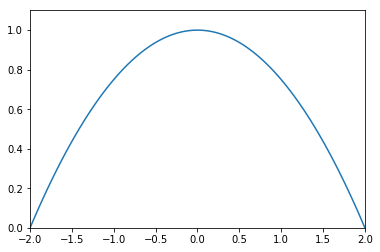

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = np.linspace(-2, 2, 100)
plt.xlim(-2, 2)
plt.ylim(0, 1.1)
plt.plot(x, 1-x**2/4)

This is the kernel that performs the classification. We perform the post-selection on observing 0 on the measurement on the ancilla and calculate the probabilities of the test instance belonging to either class:

In [ ]:
def postselect(result_counts):
    total_samples = sum(result_counts.values())

    # define lambda function that retrieves only results where the ancilla is in the |0> state
    post_select = lambda counts: [(state, occurences) for state, occurences in counts.items() if state[-1] == '0']

    # perform the postselection
    postselection = dict(post_select(result_counts))
    postselected_samples = sum(postselection.values())
    ancilla_post_selection = postselected_samples/total_samples

    print('Ancilla post-selection probability was found to be ',round(ancilla_post_selection,3))
    retrieve_class = lambda binary_class: [occurences for state, occurences in postselection.items() if state[0] == str(binary_class)]

    prob_class0 = sum(retrieve_class(0))/postselected_samples
    prob_class1 = sum(retrieve_class(1))/postselected_samples

    print('Probability for class 0 is', round(prob_class0,3))
    print('Probability for class 1 is', round(prob_class1,3))

For the first instance we have:

In [ ]:
circuit_0 = interfere_data_and_test_instances(state_preparation_0, q, c, angles)
job = execute(circuit_0, backend)
result = job.result()
count = result.get_counts(circuit_0)
print(count)
postselect(count)

{'1011': 222, '1110': 272, '0001': 35, '1111': 4, '0101': 1, '1010': 5, '0000': 38, '0100': 447}
Ancilla post-selection probability was found to be  0.744
Probability for class 0 is 0.636
Probability for class 1 is 0.364


And for the second one:

In [ ]:
angles = [test_angles[1], training_angle]
state_preparation_1 = prepare_state(q, c, angles)
circuit_1 = interfere_data_and_test_instances(state_preparation_1, q, c, angles)
job = execute(circuit_1, backend)
result = job.result()
count = result.get_counts(circuit_1)
print(count)
postselect(count)

{'1110': 339, '1111': 13, '1010': 88, '1011': 63, '0000': 1, '0100': 520}
Ancilla post-selection probability was found to be  0.926
Probability for class 0 is 0.55
Probability for class 1 is 0.45


# References

[1] M. Schuld, M. Fingerhuth, F. Petruccione. (2017). [Implementing a distance-based classifier with a quantum interference circuit](https://doi.org/10.1209/0295-5075/119/60002). *Europhysics Letters*, 119(6), 60002. <a id='1'></a>